###Analyse
* Wat is het probleem? 
  - De kwaliteit van de wijn voorspellen (Boven de 7 is goed, alles daaronder is slechte kwaliteit)(Classificatie).
* Wat voor labels heb je?
  - Quality 
* Dimensie data set?
  - Er zijn 12 kolommen en 1599 rijen.
* Soorten data/features?
  - Er is alleen numerieke data
    
    De features zijn:
      - fixed acidity

      - volatile acidity

      - citric acid

      - residual sugar

      - chlorides

      - free sulfur dioxide

      - total sulfur dioxide

      - density
      - pH

      - sulphates

      - alcohol
      - quality: score tussen 0 en 10



##Voorspelling:
* Welke classifier zal het beste zijn en waarom? 
  - De SVM heeft een hoge accuraatheid en doet het goed bij niet al te grote datasets. 
  - De KNN doet het goed bij grotere datasets, dus maar werkt wel goed bij non-lineaire data.
  - Ik voorspel dat SVM het beste zal doen om deze redenen.
* Welke hyperparameters zijn relevant en waarom?
  - Voor de KNN is de hoeveelheid neighbours belangrijk, anders kan de voorspelling 'off' zijn.
  - Voor de SVM is het belangrijk welk model je kiest (linear of Radial Basis Function) en de C parameter.

##Methoden
* Welke preprocessing stappen zijn nodig?
  - Alle waardes beneden de 7 kunnen omgezet worden naar een 0 voor slecht en alles boven de 7 naar een 1 voor goed.
* Welke classifiers ga je vergelijken? (Minimaal 2 per dataset)
  - De KNN en SVM, dit omdat het allebei classificatie classifiers zijn en een andere werking hebben.
* Welke performance metric is passend?
  - De area under curve (AUC) en ROC curve.

##Resultaten

*Niet alleen beste resultaat geven, het gaat juist ook om de vergelijking/verbetering!*
* Minimaal 1 visualisatie/plotje per dataset.
* Evaluatie/conclusie
* Welke classifier leverde beste resultaat op?
* Klopt dit met je voorspelling? Waarom wel/niet?

In [27]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import math

from sklearn.metrics import roc_curve
from matplotlib import pyplot
from sklearn.metrics import roc_auc_score

from sklearn.svm import SVC
from sklearn import datasets, metrics, model_selection, svm
%matplotlib inline

In [3]:
df = pd.read_csv("/content/drive/My Drive/minor/ML/wine-quality.csv", sep =",")

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Geen categorische data, nu kijken of er null waardes zijn.

In [5]:
df.isnull().any().any()


False

Geen missende values, laten we kijken welke features een hoge correlatie hebben met quality.

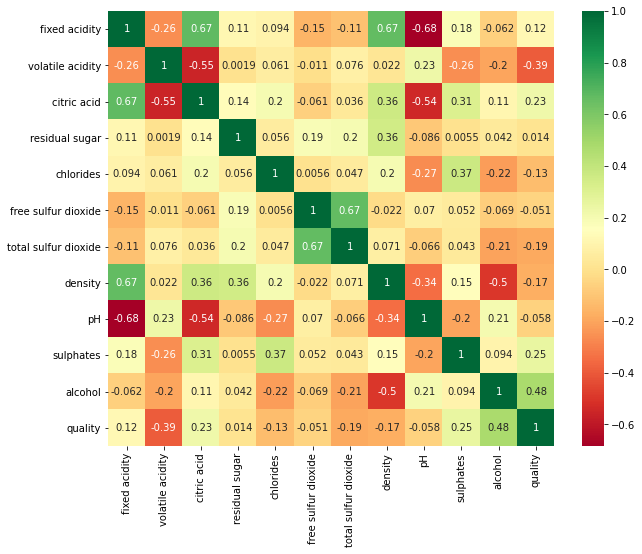

In [6]:
sns.heatmap(df.corr(),annot=True, cmap='RdYlGn')
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

Uit deze heatmap is af te lezen hoe de quality de hoogste correlatie heeft met alcohol, sulphates en citric acid.

Acidity (-0.39), chlorides (-0.13), free sulfur dioxide (-0.051), total sulfur dioxide (-0.19), density (-0.17) en PH (-0.058) zijn negatief gerelateerd aan quality. Dit betekent dat wanneer de quality hoger wordt als deze waardes lager zijn en andersom ook.

Nu alle quality boven de 7 omzetten naar 1, wat betekent dat het goede kwaliteit is. De rest zal op 0 blijven.

In [7]:
# alles vanaf 7 omzetten naar 1 (goed)
df['quality'] = np.where(df.quality > 6, 0, 1)
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,1
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,1
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,0
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,0
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,1


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,0.864290
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.342587
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,1.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,1.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,1.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


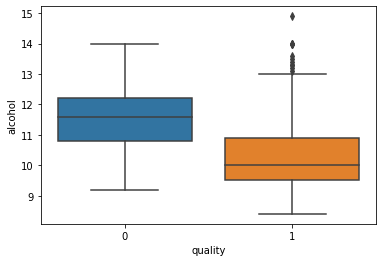

In [28]:
# boxplot om te kijken naar de verdeling van de kwaliteit vergeleken met alcohol
sns.boxplot('quality', 'alcohol', data = df)

df.describe()

Hier zien we dat er een paar features een hoge standaard deviatie hebben, maar ze hebben dan ook een hogere maximale waarde dus dit komt overeen.
Nu gaan we de data opsplitsen in test en train data en dan de modellen testen.

In [9]:
X = df.drop('quality', axis=1)
print(X.shape)

y = df.quality
print(y.shape)

(1599, 11)
(1599,)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 6) 

# KNN

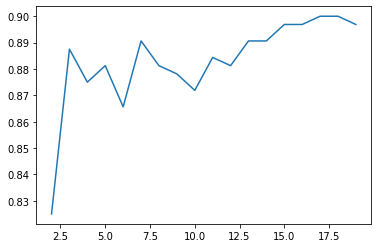

In [11]:
list1 = []
for neighbors in range(2,20):
  classifier = KNeighborsClassifier(n_neighbors=neighbors)
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  list1.append(accuracy_score(y_test,y_pred))
plt.plot(list(range(2,20)), list1)
plt.show()

Hier zien we dat het beste aantal K op ongeveer 17 ligt, dus die zullen we dan ook op 17 zetten.

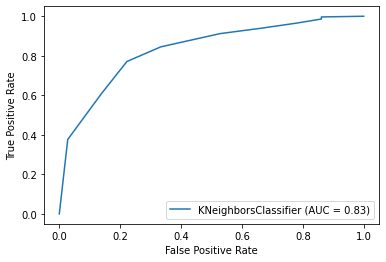

Accuracy: 0.9


In [29]:
knn = KNeighborsClassifier(n_neighbors=17) #neighbours op 17
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

knn_acc =accuracy_score(knn_pred, y_test)

metrics.plot_roc_curve(knn, X_test, y_test)  
plt.show()
print(f'Accuracy: {knn_acc}')

# SVM

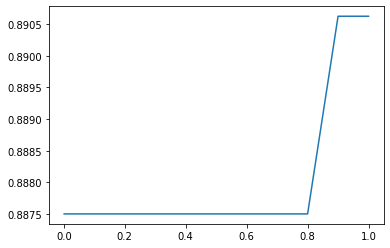

In [13]:
list1 = []
for c in [0.001, 0.01, 0.05, 0.1, 0.2, 0.4, 0.5, 0.75, 0.8, 0.9, 1]:
  classifier = SVC(C = c)
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  list1.append(accuracy_score(y_test,y_pred))
plt.plot([0.001, 0.01, 0.05, 0.1, 0.2, 0.4, 0.5, 0.75, 0.8, 0.9, 1], list1)
plt.show()

Hier zien we hoe het beste aantal voor C op ongeveeer 0.9 ligt. Deze zullen we dan ook op 0.9 zetten.

Accuracy:  0.890625


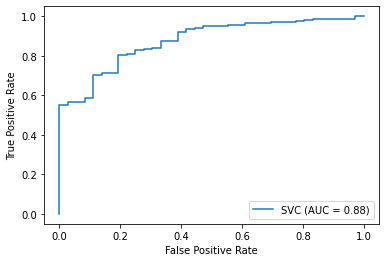

In [17]:
model=svm.SVC(kernel='rbf', C=0.9) #c naar 0.9
model.fit(X_train,y_train)
svm_pred=model.predict(X_test)

print('Accuracy: % f' % accuracy_score(svm_pred, y_test))
metrics.plot_roc_curve(model, X_test, y_test)  
plt.show()

##Conclusie
De KNN heeft een AUC van 0.83 en de SVM 0.88. 

Dat betekent dus dat de SVM classifier het beter gedaan heeft dan de KNN. Dit komt overeen met mijn voorspelling. 

Dit komt waarschijnlijk omdat er een enkele outlier in zat en KNN hier heel gevoelig voor is. Ook omdat het een kleinere dataset is, zal KNN het minder gedaan hebben.

#Bronnen

Metrics
- https://towardsdatascience.com/metrics-to-evaluate-your-machine-learning-algorithm-f10ba6e38234
